In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import array
from datetime import datetime
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

#### Reading the two .csv provided and looking at their fields

In [55]:
activity = pd.read_csv("./haverhill-request/haverhill-activity.csv")
request = pd.read_csv("./haverhill-request/haverhill-request.csv", encoding = 'unicode_escape')

In [56]:
activity.head()

,Activity ID,Activity Type,Activity Code,Activity Date,Request ID
0,9821,Created,9,2017-01-03 13:11:00,5130
1,9822,Activity entered,7,2017-01-03 13:11:00,5130
2,9823,Service Request Type changed,5,2017-01-03 13:20:00,5130
3,9824,Routed,1,2017-01-03 13:20:00,5130
4,9825,Service Request Type changed,5,2017-01-03 13:21:00,5130


In [57]:
activity.shape

(187187, 5)

In [58]:
request.head()

,Request ID,Create Date,Master Request,Has Links,Status,Status Code,Last Action,Last Change,Close Date,Work Order Created,...,Cross Street ID,Cross Street,District ID,District,Escalations,Priority,Longitude,Latitude,Origin ID,Origin
0,5130,2017-01-03 13:11:00,0,False,Closed,1,2017-01-03 14:05:00,2017-01-03 14:05:00,2017-01-03 14:05:00,False,...,0,NaN,1,Mt Washington,0,2,-71.105902,42.767552,1,Call Center
1,5131,2017-01-03 13:29:00,0,False,Closed,1,2017-01-03 13:29:00,2017-01-03 13:29:00,2017-01-03 13:29:00,False,...,0,NaN,0,NaN,0,2,0.000000,0.000000,1,Call Center
2,5132,2017-01-03 13:33:00,0,False,Closed,1,2017-01-03 13:33:00,2017-01-03 13:33:00,2017-01-03 13:33:00,False,...,0,NaN,0,NaN,0,2,0.000000,0.000000,1,Call Center
3,5133,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,0,NaN,0,NaN,0,2,0.000000,0.000000,1,Call Center
4,5134,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,0,NaN,0,NaN,0,2,0.000000,0.000000,1,Call Center


In [59]:
request.shape

(70060, 33)

#### Grouping request data by Origin of request to find out what platform was used to make requests

In [60]:
request_grouped_by_origin = request.groupby(['Origin'])

In [61]:
# request.groupby(['Origin']).count().plot(kind='bar')
counts = request.groupby('Origin')['Request ID'].agg(len)

In [62]:
print(counts)

Origin
Call Center           66870
Control Panel           724
Report2Gov Android      110
Report2Gov Website        2
Report2Gov iOS          321
Text Message              5
Website                2028
Name: Request ID, dtype: int64


In [63]:
origins = request['Origin'].unique()
np.arange(len(origins))

array([0, 1, 2, 3, 4, 5, 6])

#### Plotting number of based on Origin of Request

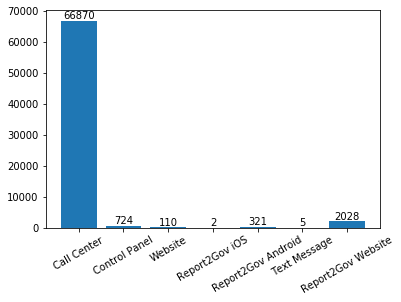

In [64]:
fig, ax = plt.subplots()
plt.xticks(np.arange(len(origins)),origins,rotation=30)
bars = plt.bar(np.arange(len(origins)),counts)
for i,rect in enumerate(bars):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,counts[i], ha='center', va='bottom')

#### Grouping request data by City of request to see how many requests originated from outside of Haverhill

In [65]:
request.groupby('City')['Request ID'].agg(len)

City
Groveland            2
Haverhill        70057
North Andover        1
Name: Request ID, dtype: int64

In [66]:
request['Close Date'] = request['Close Date'].astype('str')

#### Calculating the difference in Create Date and Close Date (datetime objects) to find Completion Time. Requests that have not been closed yet are given NaN values

In [67]:
diff_time = []
for i,time in tqdm(enumerate(request['Create Date'].values),total = len(request['Create Date'].values)):
    timecreated = datetime.strptime(time, "%Y-%m-%d %H:%M:%S")
    if request['Close Date'][i] != 'nan':
        timeclosed = datetime.strptime(request['Close Date'][i], "%Y-%m-%d %H:%M:%S")
        diff_time.append(timeclosed - timecreated)
    else:
        diff_time.append('nan')
        pass
    
    
    

#### Adding Completion Time as a new column to request dataframe

In [68]:
request['Completion Time'] = diff_time

In [69]:
request.head()

,Request ID,Create Date,Master Request,Has Links,Status,Status Code,Last Action,Last Change,Close Date,Work Order Created,...,Cross Street,District ID,District,Escalations,Priority,Longitude,Latitude,Origin ID,Origin,Completion Time
0,5130,2017-01-03 13:11:00,0,False,Closed,1,2017-01-03 14:05:00,2017-01-03 14:05:00,2017-01-03 14:05:00,False,...,NaN,1,Mt Washington,0,2,-71.105902,42.767552,1,Call Center,00:54:00
1,5131,2017-01-03 13:29:00,0,False,Closed,1,2017-01-03 13:29:00,2017-01-03 13:29:00,2017-01-03 13:29:00,False,...,NaN,0,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00
2,5132,2017-01-03 13:33:00,0,False,Closed,1,2017-01-03 13:33:00,2017-01-03 13:33:00,2017-01-03 13:33:00,False,...,NaN,0,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00
3,5133,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,NaN,0,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00
4,5134,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,NaN,0,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00


In [70]:
# request.loc[request['Completion Time'] == 'nan']

In [71]:
# request.groupby('Request Type')['Request ID'].agg(len)

#### Obtaining the day the request(from Create Date datetime object) was created to group data based on day of week. Creating a new column in the dataframe for DayofWeek

In [72]:
dayofweek = []
for i,time in enumerate(request['Create Date'].values):
#     dayofweek = 
    dayofweek.append(datetime.strptime(time, "%Y-%m-%d %H:%M:%S").weekday())
#     print(dayofweek)
#     request['DayofWeek'][i] = dayofweek

In [73]:
request['DayofWeek'] = dayofweek

In [74]:
request.head()

,Request ID,Create Date,Master Request,Has Links,Status,Status Code,Last Action,Last Change,Close Date,Work Order Created,...,District ID,District,Escalations,Priority,Longitude,Latitude,Origin ID,Origin,Completion Time,DayofWeek
0,5130,2017-01-03 13:11:00,0,False,Closed,1,2017-01-03 14:05:00,2017-01-03 14:05:00,2017-01-03 14:05:00,False,...,1,Mt Washington,0,2,-71.105902,42.767552,1,Call Center,00:54:00,1
1,5131,2017-01-03 13:29:00,0,False,Closed,1,2017-01-03 13:29:00,2017-01-03 13:29:00,2017-01-03 13:29:00,False,...,0,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00,1
2,5132,2017-01-03 13:33:00,0,False,Closed,1,2017-01-03 13:33:00,2017-01-03 13:33:00,2017-01-03 13:33:00,False,...,0,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00,1
3,5133,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,0,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00,1
4,5134,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,0,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00,1


In [75]:
counts = request.groupby('DayofWeek')['Request ID'].agg(len)

In [76]:
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

#### Plotting number of requests per day of the Week

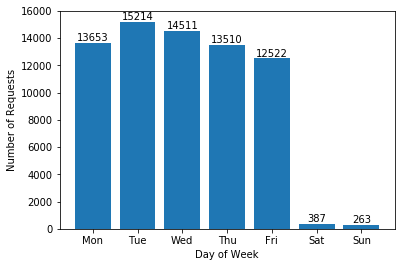

In [77]:
# print(counts)
fig, ax = plt.subplots()
plt.xticks(np.arange(len(request['DayofWeek'].unique())),days,rotation=0)
bars = plt.bar(np.arange(len(request['DayofWeek'].unique())),counts)
plt.xlabel('Day of Week')
plt.ylabel('Number of Requests')
for i,rect in enumerate(bars):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,counts[i], ha='center', va='bottom')

#### Obtaining the month of the request(from Create Date datetime object) to group data based on month Creating a new column in the dataframe for Month

In [78]:
month = []
for i,time in enumerate(request['Create Date'].values):
    month.append(datetime.strptime(time, "%Y-%m-%d %H:%M:%S").month)
    

In [79]:
request['Month'] = month

#### Mapping the Months to a dictionary for seasons and grouping to observe seasonal requests 

In [80]:
# request.head()
seasons = {'Spring':[4,5],'Summer':[6,7,8],'Fall':[9,10,11],'Winter':[12,1,2,3]}

In [81]:
print(seasons.keys())

dict_keys(['Spring', 'Summer', 'Fall', 'Winter'])


In [82]:
counts = request.groupby('Month')['Request ID'].agg(len)

In [83]:
seasoncounts = []
for key in seasons:
    seasoncounts.append(counts[seasons[key]].sum())

In [84]:
print(seasoncounts)

[14017, 19372, 14442, 22229]


#### Plotting number of requests per season

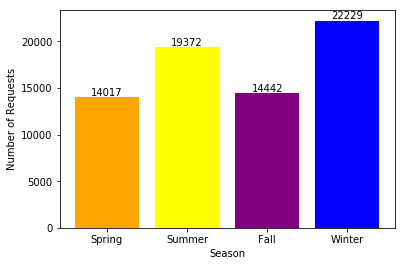

In [85]:
fig, ax = plt.subplots()
plt.xticks(np.arange(len(seasoncounts)),seasons.keys(),rotation=0)
bars = plt.bar(np.arange(len(seasoncounts)),seasoncounts, color=['orange', 'yellow', 'purple', 'blue'])
plt.xlabel('Season')
plt.ylabel('Number of Requests')
for i,rect in enumerate(bars):
    height = rect.get_height()
#     print(height)
#     print(rect.get_y())
#     print(rect.get_width())
    plt.text(rect.get_x() + rect.get_width()/2.0, height,seasoncounts[i], ha='center', va='bottom')

### Grouping requests by their type

In [86]:
requesttypecounts = request.groupby('Request Type')['Request ID'].agg(len).sort_values(ascending = False)

In [87]:
# request.groupby('Request Type')['Request Type'].agg(len).sort_values(ascending = False)[0:20]

#### Looking at top 20 and top 30 Request types

In [88]:
r_top20 = request.groupby('Request Type')['Request Type'].agg(len).sort_values(ascending = False)[0:20]

In [89]:
r_top30 = request.groupby('Request Type')['Request Type'].agg(len).sort_values(ascending = False)[0:30]

#### It was observed the Information Inquiries request types, as specified in filterA, comprise of roughly 80% of the request data. They were separated to better view the distribution of requests.

In [3]:
filterA = ['A - Information Other', 
'A - Transfer Inspections', 
'A - Transfer Other', 
'A - Transfer Treasurer', 
'A - Information Treasurer ', # A - Information Treasurer has a 'space' here as thats how its provided in the data
'A - Transfer Assessor',
'A - Information Assessor',
'A - Information Inspections']

In [91]:
requestA = request.loc[request['Request Type'].isin(filterA)]
requestnotA = request.loc[~request['Request Type'].isin(filterA)]
# requestnotA.groupby('Request Type')['Request ID'].agg(len).sort_values(ascending = False)
reqAcounts = requestA.groupby('Request Type')['Request ID'].agg(len).sort_values(ascending = False)
reqnotAcounts = requestnotA.groupby('Request Type')['Request ID'].agg(len).sort_values(ascending = False)[0:30]

In [92]:
top20names = ['A - Information Other',                               
'A - Transfer Inspections',                             
'A - Transfer Other',                                    
'A - Transfer Treasurer',                                
'A - Information Treasurer',                             
'A - Transfer Assessor',                                 
'Highway - Pothole',                                     
'A - Information Assessor',                              
'Snow Removal Issues - Sanding Request',                 
'Tree Issues - City Owned Tree Issue',                    
'Snow Removal Issues - Replow Request',                   
'TRASH - Missed Pick Up',                                 
'Traffic/Street Lights - Street Light Repair',            
'A - Information Inspections',                            
'Highway - Sidewalk Issues',                              
'Highway - Street issues',                                
'Tree Issues - Tree Pruning/Trimming',                    
'Street Sign Issues - Street Signs Missing/Damaged',      
'Highway - Overgrown grass/weeds',                        
'Tree Issues - tree limb pickup']                  

In [93]:
top30names = ['A - Information Other',                               
'A - Transfer Inspections',                             
'A - Transfer Other',                                    
'A - Transfer Treasurer',                                
'A - Information Treasurer',                             
'A - Transfer Assessor',                                 
'Highway - Pothole',                                     
'A - Information Assessor',                              
'Snow Removal Issues - Sanding Request',                 
'Tree Issues - City Owned Tree Issue',                    
'Snow Removal Issues - Replow Request',                   
'TRASH - Missed Pick Up',                                 
'Traffic/Street Lights - Street Light Repair',            
'A - Information Inspections',                            
'Highway - Sidewalk Issues',                              
'Highway - Street issues',                                
'Tree Issues - Tree Pruning/Trimming',                    
'Street Sign Issues - Street Signs Missing/Damaged',      
'Highway - Overgrown grass/weeds',                        
'Tree Issues - tree limb pickup',   
'Snow Removal Issues - Street Unplowed',                                  
'Trash - Illegal Dumping',                                                
'Highway - trash/debris pickup',                                          
'Voicemails',                                                             
'RECYCLING - Missed Pick Up' ,                                            
'Traffic/Street Lights - Street Light Repair - National Grid-Owned' ,     
'Highway - Catch Basin Repair',                                           
'Highway - Apron/Curb Repair',                                            
'Stormwater/Sewer - Catch Basin Cleaning',                                
'Engineering - Sink Holes']

In [94]:
reqnotAtop30 = ['Highway - Pothole',                                     
'Snow Removal Issues - Sanding Request',                 
'Tree Issues - City Owned Tree Issue',                    
'Snow Removal Issues - Replow Request',                   
'TRASH - Missed Pick Up',                                 
'Traffic/Street Lights - Street Light Repair',            
'Highway - Sidewalk Issues',                              
'Highway - Street issues',                                
'Tree Issues - Tree Pruning/Trimming',                    
'Street Sign Issues - Street Signs Missing/Damaged',      
'Highway - Overgrown grass/weeds',                        
'Tree Issues - tree limb pickup',   
'Snow Removal Issues - Street Unplowed',                                  
'Trash - Illegal Dumping',                                                
'Highway - trash/debris pickup',                                          
'Voicemails',                                                             
'RECYCLING - Missed Pick Up' ,                                            
'Traffic/Street Lights - Street Light Repair - National Grid-Owned' ,     
'Highway - Catch Basin Repair',                                           
'Highway - Apron/Curb Repair',                                            
'Stormwater/Sewer - Catch Basin Cleaning',                                
'Engineering - Sink Holes',
'Tree Issues - Tree Removal',                                            
'Highway - Manhole Repair',                                              
'Snow Removal Issues - Sidewalk Snow Removal',                           
'Highway - Street Paving Request',                                       
'Highway - Street Cleaning/Sweeping',                                    
'Tree Issues - Tree Fallen Across Road',                                 
'New Toter Request',                                                    
'Toter Issues']

#### Plotting top 20 request Types

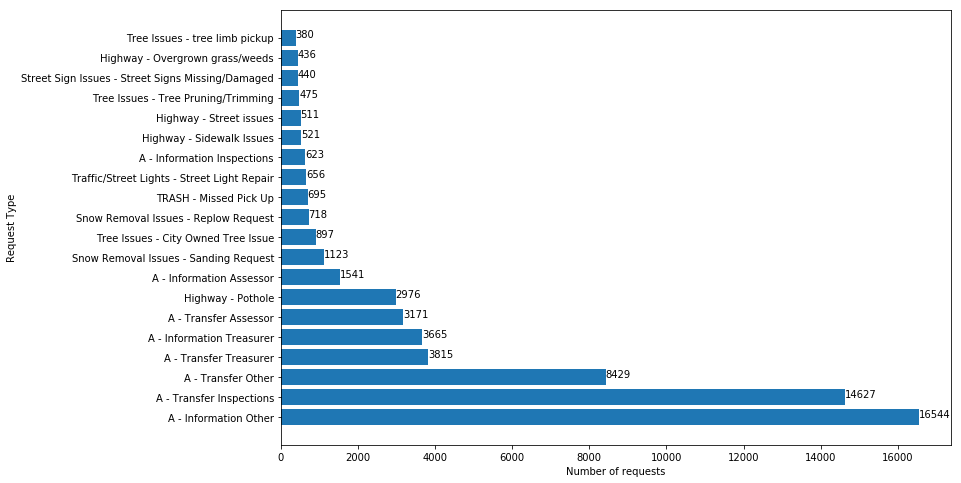

In [95]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(len(r_top20)),top20names,rotation=0)
bars = plt.barh(np.arange(len(r_top20)),r_top20)
plt.xlabel('Number of requests')
plt.ylabel('Request Type')
for i,rect in enumerate(bars):
    width = rect.get_width()
    plt.text(width,rect.get_height()/2+rect.get_y(),r_top20[i])

#### Plotting top 30 request Types

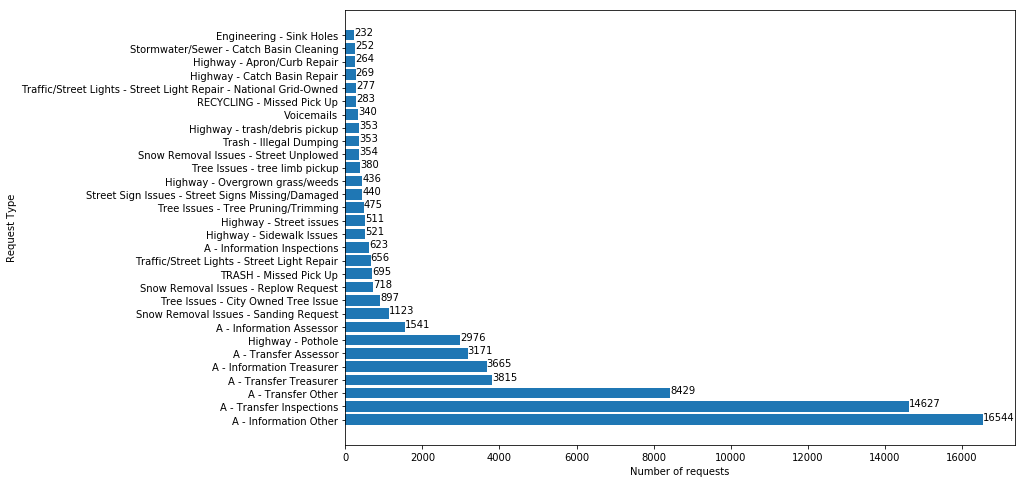

In [96]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(len(r_top30)),top30names,rotation=0)
bars = plt.barh(np.arange(len(r_top30)),r_top30)
plt.xlabel('Number of requests')
plt.ylabel('Request Type')
for i,rect in enumerate(bars):
    width = rect.get_width()
    plt.text(width,rect.get_height()/2+rect.get_y(),r_top30[i])

#### Plotting Information inquiries (filterA) request types

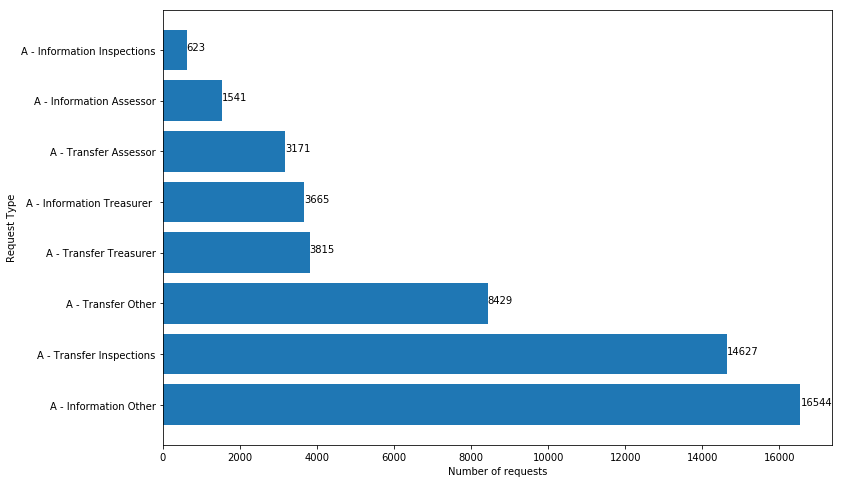

In [97]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(len(reqAcounts)),filterA,rotation=0)
bars = plt.barh(np.arange(len(reqAcounts)),reqAcounts)
plt.xlabel('Number of requests')
plt.ylabel('Request Type')
for i,rect in enumerate(bars):
    width = rect.get_width()
    plt.text(width,rect.get_height()/2+rect.get_y(),reqAcounts[i])

#### Plotting top 30 request Types excluding Information inquiries

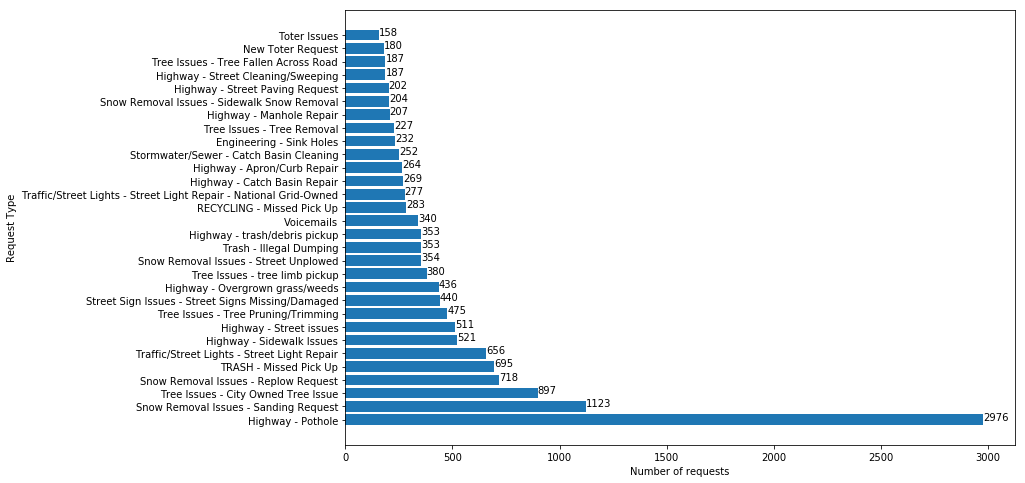

In [98]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(len(reqnotAcounts)),reqnotAtop30,rotation=0)
bars = plt.barh(np.arange(len(reqnotAcounts)),reqnotAcounts)
plt.xlabel('Number of requests')
plt.ylabel('Request Type')
for i,rect in enumerate(bars):
    width = rect.get_width()
    plt.text(width,rect.get_height()/2+rect.get_y(),reqnotAcounts[i])

#### Obtaining the year of the request(from Create Date datetime object) to group data based on year. Creating a new column in the dataframe for Year

In [99]:
year = []
for i,time in tqdm(enumerate(request['Create Date'].values),total = len(request['Create Date'].values)):
    timecreated = datetime.strptime(time, "%Y-%m-%d %H:%M:%S")
    year.append(timecreated.year)

In [100]:
request['Year'] = year

In [101]:
request.head()

,Request ID,Create Date,Master Request,Has Links,Status,Status Code,Last Action,Last Change,Close Date,Work Order Created,...,Escalations,Priority,Longitude,Latitude,Origin ID,Origin,Completion Time,DayofWeek,Month,Year
0,5130,2017-01-03 13:11:00,0,False,Closed,1,2017-01-03 14:05:00,2017-01-03 14:05:00,2017-01-03 14:05:00,False,...,0,2,-71.105902,42.767552,1,Call Center,00:54:00,1,1,2017
1,5131,2017-01-03 13:29:00,0,False,Closed,1,2017-01-03 13:29:00,2017-01-03 13:29:00,2017-01-03 13:29:00,False,...,0,2,0.000000,0.000000,1,Call Center,00:00:00,1,1,2017
2,5132,2017-01-03 13:33:00,0,False,Closed,1,2017-01-03 13:33:00,2017-01-03 13:33:00,2017-01-03 13:33:00,False,...,0,2,0.000000,0.000000,1,Call Center,00:00:00,1,1,2017
3,5133,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,0,2,0.000000,0.000000,1,Call Center,00:00:00,1,1,2017
4,5134,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,0,2,0.000000,0.000000,1,Call Center,00:00:00,1,1,2017


In [102]:
yearcounts = request.groupby('Year')['Year'].agg(len)

In [103]:
years = ['2017', '2018','2019']

In [104]:
print(yearcounts.shape)

(3,)


#### Plotting number of requests per year

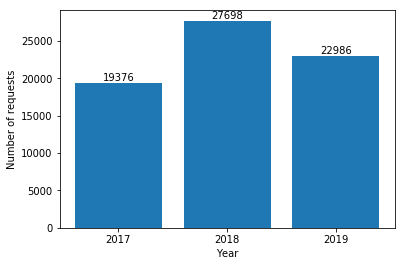

In [105]:
plt.figure()
plt.xticks(np.arange(len(years)),years,rotation=0)
bars = plt.bar(np.arange(len(years)),yearcounts)
plt.ylabel('Number of requests')
plt.xlabel('Year')
for i,rect in enumerate(bars):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,list(yearcounts)[i], ha='center', va='bottom')

### Calculating Average and Median Times for Request Types and Departments

In [106]:
gb_type = request.groupby('Request Type')
gb_type_list = [gb_type.get_group(x) for x in gb_type.groups]

In [107]:
gb_type2 = request.groupby('Department')
gb_type_list2 = [gb_type2.get_group(x) for x in gb_type2.groups]
# for key, item in gb_type2:
#     if key == '311 Call Center':
#         print(gb_type2.get_group(key)['Completion Time'].mean(), "\n\n")

In [108]:
reqA_type = requestA.groupby('Request Type')
reqA_type_list = [reqA_type.get_group(x) for x in reqA_type.groups]

In [109]:
reqnotA_type = requestnotA.groupby('Request Type')
reqnotA_type_list = [reqnotA_type.get_group(x) for x in reqnotA_type.groups]

#### Average time taken by City of Haverhill to close each Request Type

In [110]:
avgtime_type = {}
for i,group in enumerate(gb_type_list):
    temp = list(set(group['Request Type']))
    avgtime_type[temp[0]] = group['Completion Time'].mean()
avgtime_type

{'A - Information Assessor': Timedelta('0 days 00:44:09.617131'),
 'A - Information Inspections': Timedelta('0 days 20:53:35.942028'),
 'A - Information Other': Timedelta('0 days 13:00:35.054712'),
 'A - Information Treasurer ': Timedelta('0 days 00:03:17.701965'),
 'A - Transfer Assessor': Timedelta('0 days 00:10:52.052980'),
 'A - Transfer Inspections': Timedelta('0 days 00:45:16.204020'),
 'A - Transfer Other': Timedelta('0 days 01:28:49.766172'),
 'A - Transfer Treasurer': Timedelta('0 days 01:07:02.878112'),
 'Abandoned Vehicles': Timedelta('73 days 18:52:00'),
 'Accumulation of Litter/Garbage': Timedelta('123 days 21:12:56.250000'),
 "Assessor's": Timedelta('0 days 03:13:00'),
 'BULK ITEM - Missed pick up': Timedelta('1 days 13:29:29.347826'),
 'Barking Dog': Timedelta('51 days 08:48:17.142857'),
 'Cancelled Rental Carts': Timedelta('0 days 00:01:00'),
 'Cart Repairs': Timedelta('0 days 04:17:18.461538'),
 'Chickens': Timedelta('135 days 20:22:30'),
 'City Clerk': Timedelta('0 da

#### Average time taken by City of Haverhill to close each request based on Department

In [111]:
avgtime_type2 = {}
for i,group in enumerate(gb_type_list2):
    temp = list(set(group['Department']))
#     print(temp[0])
    avgtime_type2[temp[0]] = group['Completion Time'].mean()
avgtime_type2

{'311 Call Center': Timedelta('0 days 10:17:38.771705'),
 'Animal control': Timedelta('34 days 06:25:58.518518'),
 'Assessing': Timedelta('0 days 03:13:00'),
 'City Clerk': Timedelta('0 days 00:03:36'),
 'Fire': Timedelta('43 days 15:37:32.727272'),
 'Fire & Police': Timedelta('10 days 04:17:44.150943'),
 'Highway': Timedelta('34 days 19:34:38.989445'),
 'Inspectional Services': Timedelta('92 days 01:02:44.796380'),
 'Mayor': Timedelta('158 days 20:24:48'),
 'Planning': Timedelta('99 days 11:06:00'),
 'Police': Timedelta('41 days 00:02:17.821782'),
 'Stormwater/Sewer': Timedelta('53 days 23:42:25.982142'),
 'Treasurer': Timedelta('114 days 02:11:34.285714'),
 'Water': Timedelta('153 days 17:22:43.140495'),
 'Water Billing': Timedelta('6 days 07:12:12'),
 'Water/Wastewater Department': Timedelta('67 days 04:48:15.555555')}

#### Average time taken by City of Haverhill to close Information Inquiries

In [112]:
reqA_avgtime = {}
for i,group in enumerate(reqA_type_list):
    temp = list(set(group['Request Type']))
#     print(temp[0])
    reqA_avgtime[temp[0]] = group['Completion Time'].mean()
reqA_avgtime

{'A - Information Assessor': Timedelta('0 days 00:44:09.617131'),
 'A - Information Inspections': Timedelta('0 days 20:53:35.942028'),
 'A - Information Other': Timedelta('0 days 13:00:35.054712'),
 'A - Information Treasurer ': Timedelta('0 days 00:03:17.701965'),
 'A - Transfer Assessor': Timedelta('0 days 00:10:52.052980'),
 'A - Transfer Inspections': Timedelta('0 days 00:45:16.204020'),
 'A - Transfer Other': Timedelta('0 days 01:28:49.766172'),
 'A - Transfer Treasurer': Timedelta('0 days 01:07:02.878112')}

#### Average time taken by City of Haverhill to close Request Types excluding Information Inquiries

In [113]:
reqnotA_avgtime = {}
for i,group in enumerate(reqnotA_type_list):
    temp = list(set(group['Request Type']))
#     print(temp[0])
    reqnotA_avgtime[temp[0]] = group['Completion Time'].mean()
reqnotA_avgtime

{'Abandoned Vehicles': Timedelta('73 days 18:52:00'),
 'Accumulation of Litter/Garbage': Timedelta('123 days 21:12:56.250000'),
 "Assessor's": Timedelta('0 days 03:13:00'),
 'BULK ITEM - Missed pick up': Timedelta('1 days 13:29:29.347826'),
 'Barking Dog': Timedelta('51 days 08:48:17.142857'),
 'Cancelled Rental Carts': Timedelta('0 days 00:01:00'),
 'Cart Repairs': Timedelta('0 days 04:17:18.461538'),
 'Chickens': Timedelta('135 days 20:22:30'),
 'City Clerk': Timedelta('0 days 00:03:36'),
 'City Council': Timedelta('0 days 07:29:00'),
 'Community Development': NaT,
 'Compost Center': Timedelta('0 days 00:00:00'),
 'Conservation/Wetlands': Timedelta('506 days 03:27:00'),
 'Construction Issues - Street Closings': Timedelta('46 days 13:20:00'),
 'Dead Animal on Street': Timedelta('31 days 01:13:15.338345'),
 'Dog License': Timedelta('0 days 00:00:00'),
 'Downed Electric Power Lines': Timedelta('8 days 11:56:42.580645'),
 'Economic Development & Planning': Timedelta('1 days 08:57:00'),
 

#### Median time taken by City of Haverhill to close each Request Type

In [114]:
mediantime_type = {}
for i,group in enumerate(gb_type_list):
    temp = list(set(group['Request Type']))
    mediantime_type[temp[0]] = group['Completion Time'].median()
mediantime_type

/Users/sarthakarora/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1019: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


{'A - Information Assessor': Timedelta('0 days 00:00:00'),
 'A - Information Inspections': Timedelta('0 days 00:00:00'),
 'A - Information Other': Timedelta('0 days 00:00:00'),
 'A - Information Treasurer ': Timedelta('0 days 00:00:00'),
 'A - Transfer Assessor': Timedelta('0 days 00:00:00'),
 'A - Transfer Inspections': Timedelta('0 days 00:00:00'),
 'A - Transfer Other': Timedelta('0 days 00:00:00'),
 'A - Transfer Treasurer': Timedelta('0 days 00:00:00'),
 'Abandoned Vehicles': Timedelta('38 days 01:09:30'),
 'Accumulation of Litter/Garbage': Timedelta('98 days 11:58:00'),
 "Assessor's": Timedelta('0 days 03:13:00'),
 'BULK ITEM - Missed pick up': Timedelta('0 days 00:00:00'),
 'Barking Dog': Timedelta('8 days 18:43:30'),
 'Cancelled Rental Carts': Timedelta('0 days 00:01:00'),
 'Cart Repairs': Timedelta('0 days 00:00:00'),
 'Chickens': Timedelta('135 days 20:22:30'),
 'City Clerk': Timedelta('0 days 00:00:00'),
 'City Council': Timedelta('0 days 00:00:00'),
 'Community Development'

#### Median time taken by City of Haverhill to close each request based on department

In [115]:
mediantime_type2 = {}
for i,group in enumerate(gb_type_list2):
    temp = list(set(group['Department']))
    mediantime_type2[temp[0]] = group['Completion Time'].median()
mediantime_type2

{'311 Call Center': Timedelta('0 days 00:00:00'),
 'Animal control': Timedelta('7 days 00:12:30'),
 'Assessing': Timedelta('0 days 03:13:00'),
 'City Clerk': Timedelta('0 days 00:00:00'),
 'Fire': Timedelta('9 days 19:25:00'),
 'Fire & Police': Timedelta('3 days 09:49:30'),
 'Highway': Timedelta('4 days 05:40:00'),
 'Inspectional Services': Timedelta('33 days 10:30:00'),
 'Mayor': Timedelta('35 days 03:22:30'),
 'Planning': Timedelta('42 days 12:22:00'),
 'Police': Timedelta('13 days 17:21:00'),
 'Stormwater/Sewer': Timedelta('6 days 23:27:00'),
 'Treasurer': Timedelta('51 days 14:57:00'),
 'Water': Timedelta('49 days 00:45:00'),
 'Water Billing': Timedelta('0 days 12:34:30'),
 'Water/Wastewater Department': Timedelta('1 days 05:30:00')}

#### Median time taken by City of Haverhill to close Information Inquiry requests

In [116]:
reqAmediantime = {}
for i,group in enumerate(reqA_type_list):
    temp = list(set(group['Request Type']))
    reqAmediantime[temp[0]] = group['Completion Time'].median()
reqAmediantime

{'A - Information Assessor': Timedelta('0 days 00:00:00'),
 'A - Information Inspections': Timedelta('0 days 00:00:00'),
 'A - Information Other': Timedelta('0 days 00:00:00'),
 'A - Information Treasurer ': Timedelta('0 days 00:00:00'),
 'A - Transfer Assessor': Timedelta('0 days 00:00:00'),
 'A - Transfer Inspections': Timedelta('0 days 00:00:00'),
 'A - Transfer Other': Timedelta('0 days 00:00:00'),
 'A - Transfer Treasurer': Timedelta('0 days 00:00:00')}

#### Median time taken by City of Haverhill to close each Request Types excluding Information Inquiries

In [117]:
reqnotAmediantime = {}
for i,group in enumerate(reqnotA_type_list):
    temp = list(set(group['Request Type']))
    reqnotAmediantime[temp[0]] = group['Completion Time'].median()
reqnotAmediantime

{'Abandoned Vehicles': Timedelta('38 days 01:09:30'),
 'Accumulation of Litter/Garbage': Timedelta('98 days 11:58:00'),
 "Assessor's": Timedelta('0 days 03:13:00'),
 'BULK ITEM - Missed pick up': Timedelta('0 days 00:00:00'),
 'Barking Dog': Timedelta('8 days 18:43:30'),
 'Cancelled Rental Carts': Timedelta('0 days 00:01:00'),
 'Cart Repairs': Timedelta('0 days 00:00:00'),
 'Chickens': Timedelta('135 days 20:22:30'),
 'City Clerk': Timedelta('0 days 00:00:00'),
 'City Council': Timedelta('0 days 00:00:00'),
 'Community Development': NaT,
 'Compost Center': Timedelta('0 days 00:00:00'),
 'Conservation/Wetlands': Timedelta('650 days 07:32:00'),
 'Construction Issues - Street Closings': Timedelta('0 days 00:00:00'),
 'Dead Animal on Street': Timedelta('7 days 13:46:00'),
 'Dog License': Timedelta('0 days 00:00:00'),
 'Downed Electric Power Lines': Timedelta('0 days 11:58:00'),
 'Economic Development & Planning': Timedelta('1 days 08:57:00'),
 'Emergency Management': Timedelta('37 days 23:

#### Filtering the average times to close the top 20 request types

In [118]:
top20avgtimes = []
for i,name in enumerate(top20names):
#     print(name)
#     print(avgtime_type.keys())
    try:
        top20avgtimes.append(avgtime_type[name])
    except:
        if name == 'A - Information Treasurer':
            top20avgtimes.append(avgtime_type[name+" "])
    
top20avgtimes       

[Timedelta('0 days 13:00:35.054712'),
 Timedelta('0 days 00:45:16.204020'),
 Timedelta('0 days 01:28:49.766172'),
 Timedelta('0 days 01:07:02.878112'),
 Timedelta('0 days 00:03:17.701965'),
 Timedelta('0 days 00:10:52.052980'),
 Timedelta('18 days 02:38:47.212449'),
 Timedelta('0 days 00:44:09.617131'),
 Timedelta('3 days 09:11:40.765805'),
 Timedelta('48 days 18:05:04.241379'),
 Timedelta('7 days 15:32:05.598885'),
 Timedelta('2 days 13:34:40.920863'),
 Timedelta('44 days 20:16:12.339622'),
 Timedelta('0 days 20:53:35.942028'),
 Timedelta('97 days 15:39:47.774294'),
 Timedelta('58 days 18:55:31.406250'),
 Timedelta('53 days 20:10:47.819548'),
 Timedelta('34 days 06:16:47.700000'),
 Timedelta('71 days 13:36:52.646239'),
 Timedelta('30 days 16:00:32.115384')]

#### Filtering the average times to close the top 30 request types excluding Information Inquiries

In [119]:
reqnotAtop30avgtimes = []
for i,name in enumerate(reqnotAtop30):
#     print(name)
#     print(avgtime_type.keys())
    reqnotAtop30avgtimes.append(reqnotA_avgtime[name])
    
reqnotAtop30avgtimes       

[Timedelta('18 days 02:38:47.212449'),
 Timedelta('3 days 09:11:40.765805'),
 Timedelta('48 days 18:05:04.241379'),
 Timedelta('7 days 15:32:05.598885'),
 Timedelta('2 days 13:34:40.920863'),
 Timedelta('44 days 20:16:12.339622'),
 Timedelta('97 days 15:39:47.774294'),
 Timedelta('58 days 18:55:31.406250'),
 Timedelta('53 days 20:10:47.819548'),
 Timedelta('34 days 06:16:47.700000'),
 Timedelta('71 days 13:36:52.646239'),
 Timedelta('30 days 16:00:32.115384'),
 Timedelta('3 days 08:18:01.694915'),
 Timedelta('16 days 01:23:58.270893'),
 Timedelta('52 days 15:59:47.636363'),
 Timedelta('1 days 06:08:02.823529'),
 Timedelta('2 days 17:00:40.782918'),
 Timedelta('91 days 01:26:17.928286'),
 Timedelta('54 days 12:19:59.736842'),
 Timedelta('101 days 05:15:21.588785'),
 Timedelta('69 days 14:19:49.285714'),
 Timedelta('294 days 08:38:32.347826'),
 Timedelta('51 days 02:31:55.217391'),
 Timedelta('38 days 22:57:31.046511'),
 Timedelta('18 days 03:04:31.470588'),
 Timedelta('133 days 23:05:42

In [120]:
# dept_names = ['311 Call Center',
#  'Animal control',
#  'Assessing',
#  'City Clerk',
#  'Fire',
#  'Fire & Police',
#  'Highway',
#  'Inspectional Services',
#  'Mayor',
#  'Planning',
#  'Police',
#  'Stormwater/Sewer',
#  'Treasurer',
#  'Water',
#  'Water Billing',
#  'Water/Wastewater Department']

In [121]:
# avgtimes_dept = []
# for i,name in enumerate(dept_names):
#     avgtimes_dept.append(avgtime_type2[name])
# avgtimes_dept

#### Filtering the median times to close the top 20 request types

In [122]:
top20medtimes = []
for i,name in enumerate(top20names):
#     print(name)
#     print(avgtime_type.keys())
    try:
        top20medtimes.append(mediantime_type[name])
    except:
        if name == 'A - Information Treasurer':
            top20medtimes.append(mediantime_type[name+" "])
top20medtimes

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('5 days 23:22:30'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 01:47:00'),
 Timedelta('14 days 22:34:00'),
 Timedelta('0 days 04:44:00'),
 Timedelta('0 days 03:15:00'),
 Timedelta('13 days 21:42:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('28 days 20:17:00'),
 Timedelta('9 days 22:06:30'),
 Timedelta('17 days 08:23:30'),
 Timedelta('9 days 20:22:30'),
 Timedelta('40 days 01:09:00'),
 Timedelta('10 days 04:22:00')]

#### Filtering the median times to close the top 30 request types excluding Information requests

In [123]:
reqnotAtop30medtimes = []
for i,name in enumerate(reqnotAtop30):
#     print(name)
#     print(avgtime_type.keys())
    reqnotAtop30medtimes.append(reqnotAmediantime[name])

reqnotAtop30medtimes

[Timedelta('5 days 23:22:30'),
 Timedelta('0 days 01:47:00'),
 Timedelta('14 days 22:34:00'),
 Timedelta('0 days 04:44:00'),
 Timedelta('0 days 03:15:00'),
 Timedelta('13 days 21:42:00'),
 Timedelta('28 days 20:17:00'),
 Timedelta('9 days 22:06:30'),
 Timedelta('17 days 08:23:30'),
 Timedelta('9 days 20:22:30'),
 Timedelta('40 days 01:09:00'),
 Timedelta('10 days 04:22:00'),
 Timedelta('0 days 01:50:00'),
 Timedelta('4 days 00:46:00'),
 Timedelta('7 days 23:01:30'),
 Timedelta('0 days 02:32:30'),
 Timedelta('0 days 01:37:00'),
 Timedelta('0 days 23:28:00'),
 Timedelta('14 days 04:06:30'),
 Timedelta('40 days 22:42:00'),
 Timedelta('15 days 12:50:30'),
 Timedelta('232 days 16:20:00'),
 Timedelta('14 days 13:23:30'),
 Timedelta('9 days 23:03:30'),
 Timedelta('4 days 19:38:30'),
 Timedelta('7 days 12:03:00'),
 Timedelta('10 days 14:56:00'),
 Timedelta('10 days 00:27:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00')]

In [124]:
sum(seasoncounts)

70060

In [125]:
sizes = []
for i,count in enumerate(seasoncounts):
#     print(i,count)
    sizes.append((count/sum(seasoncounts))*360)

#### Plotting pie chart for seasonal requests

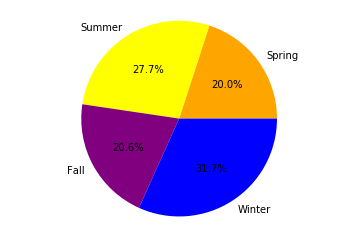

In [126]:
# sizes = [15, 30, 45, 10]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.figure()
plt.pie(sizes, explode=explode, labels=seasons.keys(), autopct='%1.1f%%', colors = ['orange', 'yellow', 'purple', 'blue'],
        shadow=False, startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [127]:
request.groupby('Department')['Department'].agg(len)

Department
311 Call Center                25014
Animal control                   168
Assessing                          2
City Clerk                         5
Fire                              34
Fire & Police                    109
Highway                        15100
Inspectional Services            313
Mayor                             22
Planning                           6
Police                           104
Stormwater/Sewer                 371
Treasurer                          7
Water                            171
Water Billing                     10
Water/Wastewater Department       81
Name: Department, dtype: int64

In [128]:
request.loc[request['Department'] == 'Assessing']
# df.loc[df['column_name'] == some_value]

,Request ID,Create Date,Master Request,Has Links,Status,Status Code,Last Action,Last Change,Close Date,Work Order Created,...,Escalations,Priority,Longitude,Latitude,Origin ID,Origin,Completion Time,DayofWeek,Month,Year
1283,6419,2017-01-30 14:01:00,0,False,Closed,1,2017-01-30 17:22:00,2017-01-30 17:22:00,2017-01-30 17:22:00,False,...,0,2,0.0,0.0,1,Call Center,03:21:00,0,1,2017
2592,7730,2017-02-16 16:38:00,0,False,Closed,1,2017-02-16 19:43:00,2017-02-16 19:43:00,2017-02-16 19:43:00,False,...,0,2,0.0,0.0,1,Call Center,03:05:00,3,2,2017
